Первые 5 строк данных:


,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,age (2000)
0,peugeot 504,46.6,4,120.0,88.0,3270,15,76,0,24
1,audi 5000s (diesel),44.6,4,121.0,67.0,2950,18,80,0,20
2,mazda glc,44.3,4,86.0,65.0,2110,11,80,1,20
3,opel 1900,43.4,4,116.0,81.0,2220,11,76,0,24
4,buick skylark,43.1,4,231.0,105.0,3425,16,77,2,23



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    int64  
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    int32  
 9   age (2000)    398 non-null    int64  
dtypes: float64(3), int32(1), int64(5), object(1)
memory usage: 29.7+ KB

Статистическое описание данных:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,age (2000)
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,25.149497,5.454774,193.425879,104.469388,2970.424623,14.384422,76.010050,1.449749,23.989950
std,8.866149,1.701004,104.269838,38.491160,846.841774,2.658660,3.697627,0.775076,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,18.000000
25%,18.000000,4.000000,104.250000,75.000000,2223.750000,12.000000,73.000000,1.000000,21.000000
50%,25.000000,4.000000,148.500000,93.500000,2803.500000,14.000000,76.000000,2.000000,24.000000
75%,32.400000,8.000000,262.000000,126.000000,3608.000000,16.000000,79.000000,2.000000,27.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,21.000000,82.000000,2.000000,30.000000



Количество пропущенных значений в каждом столбце:
name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
age (2000)      0
dtype: int64

Количество дубликатов до удаления: 0
Количество дубликатов после удаления: 0

Размер данных после удаления выбросов: (387, 10)


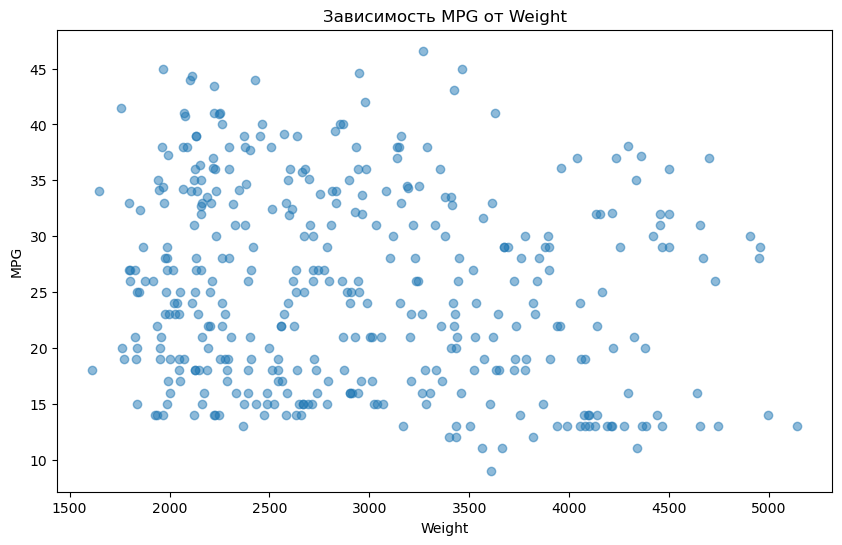

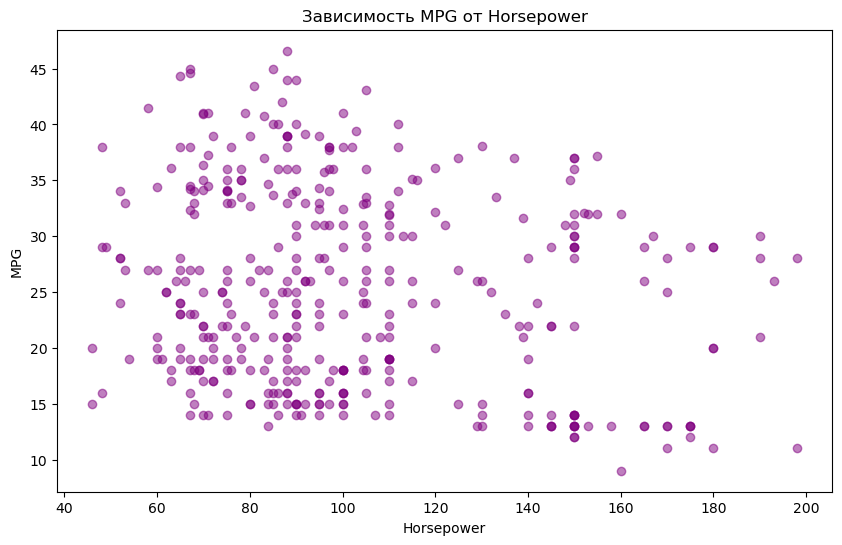

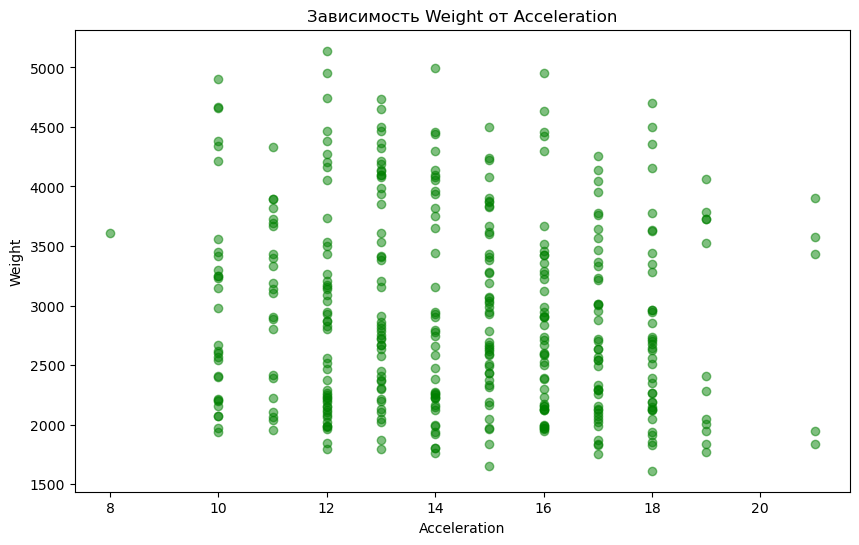

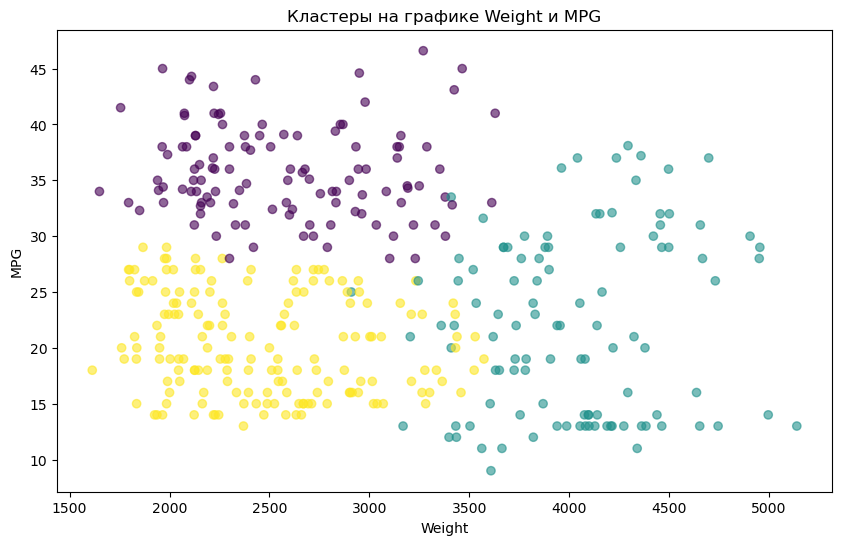

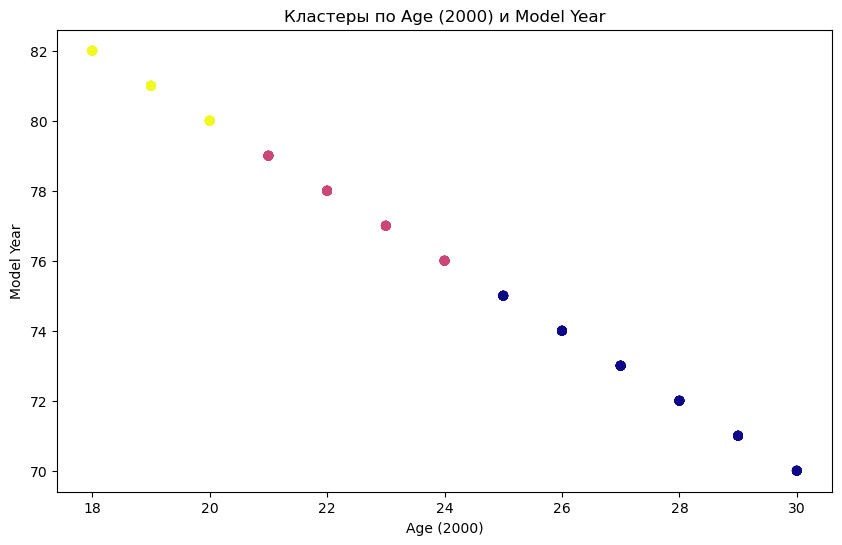

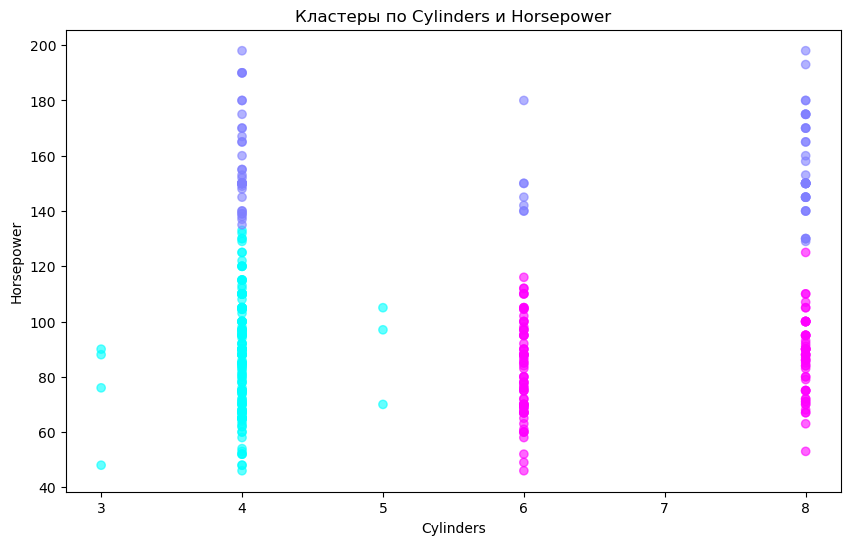

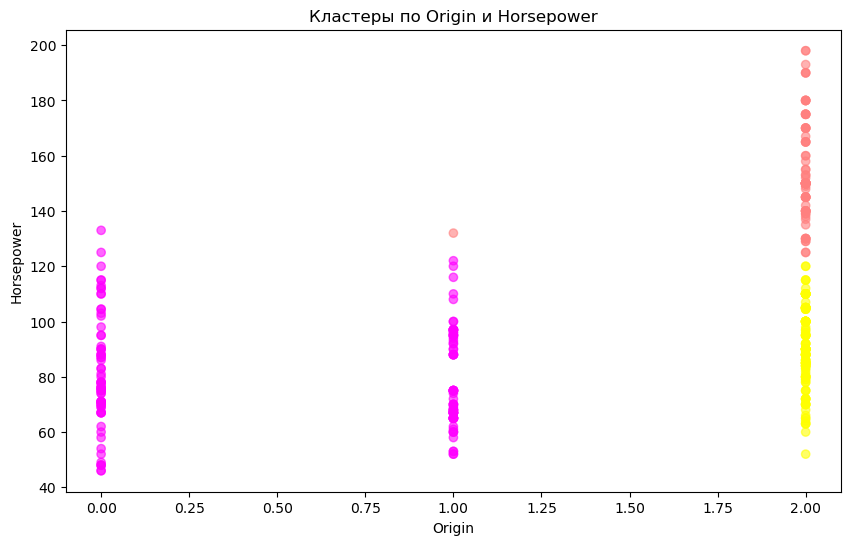

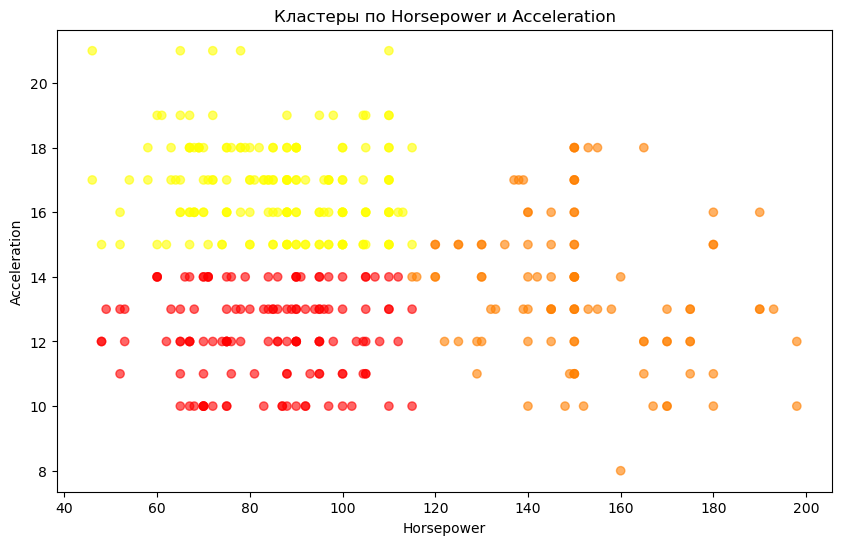


Выводы:

- Пропущенные значения были заполнены, а дубликаты удалены.
- Выбросы удалены с использованием IQR, что улучшило качество данных.
- На графиках зависимости между переменными видны группы, которые могут соответствовать типам автомобилей, например, легковые, спортивные и более тяжелые модели.
- KMeans кластеризация выделила 3 группы на основе признаков mpg, weight и horsepower, что подтверждает визуально наблюдаемые различия.
- Кластеризация по age (2000) и model_year позволяет выделить группы автомобилей по временным периодам, что может отражать различные эпохи или поколения.
- Кластеризация по cylinders и horsepower показывает распределение автомобилей по мощности двигателя и конструкции, что помогает выявить группы автомобилей с разной производительностью.
- Кластеризация по origin и horsepower выявляет группы автомобилей, в зависимости от их страны происхождения и мощности двигателя, что может отражать различия между регионами.
- Кластеризация по horsepower и acceleration п

In [102]:
import os
os.environ['OMP_NUM_THREADS'] = '2'

import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

url = r"C:\Users\masha\Desktop\1.csv"
df = pd.read_csv(url)

label_encoder = LabelEncoder()
df['origin'] = label_encoder.fit_transform(df['origin'])

print("Первые 5 строк данных:")
display(df.head())
print("\nИнформация о данных:")
df.info()
print("\nСтатистическое описание данных:")
display(df.describe())


print("\nКоличество пропущенных значений в каждом столбце:")
print(df.isnull().sum())

for col in ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']:
    df[col] = df[col].fillna(df[col].mean())

df['name'] = df['name'].fillna("Unknown")

print(f"\nКоличество дубликатов до удаления: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Количество дубликатов после удаления: {df.duplicated().sum()}")

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]
    return df

for column in ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']:
    df = remove_outliers(df, column)

print(f"\nРазмер данных после удаления выбросов: {df.shape}")


plt.figure(figsize=(10, 6))
plt.scatter(df['weight'], df['mpg'], alpha=0.5)
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Зависимость MPG от Weight')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['horsepower'], df['mpg'], alpha=0.5, color='purple')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Зависимость MPG от Horsepower')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['acceleration'], df['weight'], alpha=0.5, color='green')
plt.xlabel('Acceleration')
plt.ylabel('Weight')
plt.title('Зависимость Weight от Acceleration')
plt.show()


X = df[['mpg', 'weight', 'horsepower']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
df['cluster'] = kmeans.labels_
plt.figure(figsize=(10, 6))
plt.scatter(df['weight'], df['mpg'], c=df['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Кластеры на графике Weight и MPG')
plt.show()

X_age_model = df[['age (2000)', 'model_year']]
scaler_age_model = StandardScaler()
X_age_model_scaled = scaler_age_model.fit_transform(X_age_model)
kmeans_age_model = KMeans(n_clusters=3, random_state=42)
kmeans_age_model.fit(X_age_model_scaled)
df['cluster_age_model'] = kmeans_age_model.labels_
plt.figure(figsize=(10, 6))
plt.scatter(df['age (2000)'], df['model_year'], c=df['cluster_age_model'], cmap='plasma', alpha=0.6)
plt.xlabel('Age (2000)')
plt.ylabel('Model Year')
plt.title('Кластеры по Age (2000) и Model Year')
plt.show()

X_cylinders_hp = df[['cylinders', 'horsepower']]
scaler_cylinders_hp = StandardScaler()
X_cylinders_hp_scaled = scaler_cylinders_hp.fit_transform(X_cylinders_hp)
kmeans_cylinders_hp = KMeans(n_clusters=3, random_state=42)
kmeans_cylinders_hp.fit(X_cylinders_hp_scaled)
df['cluster_cylinders_hp'] = kmeans_cylinders_hp.labels_
plt.figure(figsize=(10, 6))
plt.scatter(df['cylinders'], df['horsepower'], c=df['cluster_cylinders_hp'], cmap='cool', alpha=0.6)
plt.xlabel('Cylinders')
plt.ylabel('Horsepower')
plt.title('Кластеры по Cylinders и Horsepower')
plt.show()

X_origin_hp = df[['origin', 'horsepower']]
scaler_origin_hp = StandardScaler()
X_origin_hp_scaled = scaler_origin_hp.fit_transform(X_origin_hp)
kmeans_origin_hp = KMeans(n_clusters=3, random_state=42)
kmeans_origin_hp.fit(X_origin_hp_scaled)
df['cluster_origin_hp'] = kmeans_origin_hp.labels_
plt.figure(figsize=(10, 6))
plt.scatter(df['origin'], df['horsepower'], c=df['cluster_origin_hp'], cmap='spring', alpha=0.6)
plt.xlabel('Origin')
plt.ylabel('Horsepower')
plt.title('Кластеры по Origin и Horsepower')
plt.show()

X_hp_acc = df[['horsepower', 'acceleration']]
scaler_hp_acc = StandardScaler()
X_hp_acc_scaled = scaler_hp_acc.fit_transform(X_hp_acc)
kmeans_hp_acc = KMeans(n_clusters=3, random_state=42)
kmeans_hp_acc.fit(X_hp_acc_scaled)
df['cluster_hp_acc'] = kmeans_hp_acc.labels_
plt.figure(figsize=(10, 6))
plt.scatter(df['horsepower'], df['acceleration'], c=df['cluster_hp_acc'], cmap='autumn', alpha=0.6)
plt.xlabel('Horsepower')
plt.ylabel('Acceleration')
plt.title('Кластеры по Horsepower и Acceleration')
plt.show()

print("\nВыводы:")
print("""
- Пропущенные значения были заполнены, а дубликаты удалены.
- Выбросы удалены с использованием IQR, что улучшило качество данных.
- На графиках зависимости между переменными видны группы, которые могут соответствовать типам автомобилей, например, легковые, спортивные и более тяжелые модели.
- KMeans кластеризация выделила 3 группы на основе признаков mpg, weight и horsepower, что подтверждает визуально наблюдаемые различия.
- Кластеризация по age (2000) и model_year позволяет выделить группы автомобилей по временным периодам, что может отражать различные эпохи или поколения.
- Кластеризация по cylinders и horsepower показывает распределение автомобилей по мощности двигателя и конструкции, что помогает выявить группы автомобилей с разной производительностью.
- Кластеризация по origin и horsepower выявляет группы автомобилей, в зависимости от их страны происхождения и мощности двигателя, что может отражать различия между регионами.
- Кластеризация по horsepower и acceleration позволяет разделить автомобили по показателям мощности и скорости разгона, выделяя спортивные, стандартные и менее мощные модели.
""")
